# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
# 1. Numeric Variable

import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
# Clean the Price column
df['Price_clean'] = (
    df['Price']
    .astype(str)  # convert to string
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

In [ ]:
# Convert to numeric
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')

In [ ]:
# Count missing values
df['Price_clean'].isna().sum()

np.int64(0)

In [ ]:
# 2. Categorical Variable

import pandas as pd

df = pd.read_csv('/content/data/mn_police_use_of_force.csv')

In [ ]:
# Standardize capitalization & strip whitespace
df['subject_injury_clean'] = (
    df['subject_injury']
    .astype(str)
    .str.strip()
    .str.lower()
)

In [ ]:
# Convert to categorical Yes/No, keep NaN as missing
df['subject_injury_clean'] = df['subject_injury_clean'].replace({
    'yes': 'Yes',
    'no': 'No'
})

In [ ]:
# Convert "nan" strings back to actual missing values
df['subject_injury_clean'] = df['subject_injury_clean'].replace({'nan': pd.NA})

In [ ]:
missing_prop = df['subject_injury_clean'].isna().mean()
print(missing_prop)

0.7619342359767892


In [ ]:
pd.crosstab(df['subject_injury_clean'], df['force_type'], normalize='columns')
df['subject_injury_clean'] = df['subject_injury_clean'].fillna('Missing')

In [ ]:
#3 Dummy Variable

import pandas as pd

df = pd.read_csv('/content/data/metabric.csv')


In [ ]:
# Extract only the text after the colon
df['OS_status_clean'] = df['Overall Survival Status'].str.split(':').str[1].str.strip()

In [ ]:
# Map to dummy variable
df['OS_dummy'] = df['OS_status_clean'].map({
    'LIVING': 1,
    'DECEASED': 0
})

In [ ]:
df[['Overall Survival Status', 'OS_status_clean', 'OS_dummy']].head()

,Overall Survival Status,OS_status_clean,OS_dummy
0,0:LIVING,LIVING,1
1,1:DECEASED,DECEASED,0
2,0:LIVING,LIVING,1
3,1:DECEASED,DECEASED,0
4,1:DECEASED,DECEASED,0


In [ ]:
#4 Missing Values
import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin1')

In [ ]:
# Count missing values
missing_count = df['Review Scores Rating'].isna().sum()
print("Missing values:", missing_count)


Missing values: 8323


In [ ]:
# Compute median of non-missing values
median_rating = df['Review Scores Rating'].median()

In [ ]:
# Create imputed variable
df['Review_Scores_Rating_imputed'] = df['Review Scores Rating'].fillna(median_rating)

In [ ]:
df[['Review Scores Rating', 'Review_Scores_Rating_imputed']].head()

,Review Scores Rating,Review_Scores_Rating_imputed
0,NaN,94.0
1,NaN,94.0
2,NaN,94.0
3,NaN,94.0
4,96.0,96.0


1. I end up with 0 missing values and cleaned up the variable Price by removing the comma for numbers greater than 999.

2. About 76.2% of the data is missing. A cross-tabulation of subect_injury with force_type showed that missing values were not evenly distributed where certain force types had a higher proportion of missing injury data.
3. N/A
4. Median imputation can bias results because it artificially reduces variability. It also hides meaningful patterns in the missing data and could misrepresent listings that have no reviews. Correlations or regression estimates could also be distorted by treating all missing ratings as identical “average” values.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

One observation is that each row represents one event of shark attack and its victim and the columns are factors or variables describing the event. The data is organized at the event level and this affects data cleaning because I would clean with the basis as event not person. For example, I would not drop events because it is missing the person's age.


4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

The min is 0 and the max is 2026.

Attacks are increasing over time.

5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

About 74% of attacks are unprovoked.

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Unprovoked attacks tend to be more fatal than provoked attacks. Maybe because unprovoked attacks are initiated by the shark from the start, whereas provoked attacks are initiated by the human.

In [ ]:
import pandas as pd

df = pd.read_excel('/content/data/GSAF5.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(axis=1, how='all')
df.shape

(7074, 23)

In [ ]:

#Inspect
df['Year'].value_counts().head(20)
#Clean
df['Year_clean'] = pd.to_numeric(df['Year'], errors='coerce')
#Check range
df['Year_clean'].describe()

,Year_clean
count,7072.000000
mean,1936.004242
std,270.672015
min,0.000000
25%,1948.000000
50%,1987.000000
75%,2010.000000
max,2026.000000


<Axes: xlabel='Year_clean'>

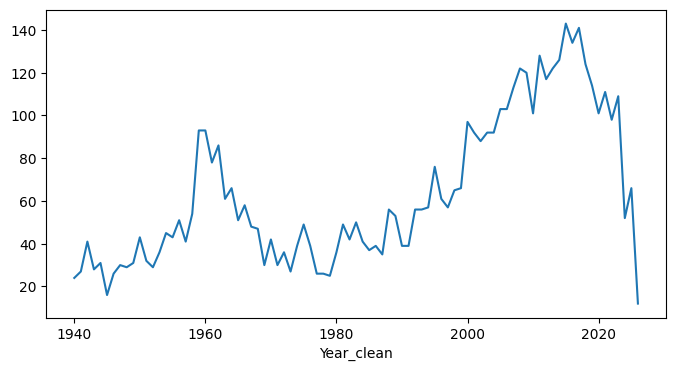

In [ ]:

#Filter attacks since 1940 & attack trend over time
df_recent = df[df['Year_clean'] >= 1940]
attacks_by_year = df_recent.groupby('Year_clean').size()
attacks_by_year.plot(kind='line', figsize=(8,4))

<Axes: ylabel='Frequency'>

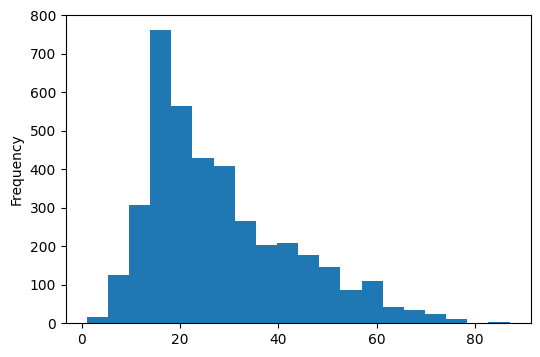

In [ ]:
#Clean the Age variable & histogram
df['Age_clean'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age_clean'].plot(kind='hist', bins=20, figsize=(6,4))

In [ ]:
#Clean the Type variable
def simplify_type(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).lower()
    if 'unprovoked' in x:
        return 'Unprovoked'
    if 'provoked' in x:
        return 'Provoked'
    return 'Unknown'

In [ ]:
df['Type_clean'] = df['Type'].apply(simplify_type)
df['Type_clean'].value_counts()

,count
Type_clean,
Unprovoked,5226
Unknown,1204
Provoked,644


In [ ]:
(df['Type_clean'] == 'Unprovoked').mean()

np.float64(0.7387616624257846)

In [ ]:
#Clean the Fatal Y/N variable
def clean_fatal(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).strip().upper()
    if 'Y' in x:
        return 'Y'
    if 'N' in x:
        return 'N'
    return 'Unknown'

In [ ]:
df['Fatal_clean'] = df['Fatal Y/N'].apply(clean_fatal)
df['Fatal_clean'].value_counts()

,count
Fatal_clean,
N,5014
Y,1490
Unknown,570


In [ ]:
pd.crosstab(df['Type_clean'], df['Fatal_clean'], normalize='index')

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.958075,0.009317,0.032609
Unknown,0.382060,0.450997,0.166944
Unprovoked,0.753349,0.004018,0.242633


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about how tidy datasets allows data cleaning easier and more effective.
2. Tidy data standard has been desgined to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together.
3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." This sentence means that tidy datasets have a set structure and rule that makes them similar like families whereas messy datasets do not have a set structure or pattern that makes them very different and unique. For example, messy datasets have values spread across multiple columns and inconsistent formatting.

"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general." This sentence means that in a given dataset, for example in a table, it's easy to figure out what the variables and observations are based on the rows and columns but when formulating a dataset, it is difficult to determine what counts as a variable and what counts as an observation. Defining variables and observations are a lot harder than identifying them in a given dataset.

4. Values: are numbers or strings that belong to a variable and an observation
Variables: contain all values that measure the same underlying attribute accross units
Observations: contain all values measured on the same unit across attributes

5. Tidy data is a standard way of mapping the meaning of a dataset to its structure. In tidy data, each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

6. 5 most common problems are:
-  column headers are values, not variable names
- multiple variables are stored in one column
- variables are stored in both rows and columns
- multiple types of observational units are stored in the same table
- a single observational unit is stored in multiple tables

The data in Table 4 are messy because the variables form both the row and columns, and column headers are values, not variable names.

Melting is when you turn columns into rows.

7. Table 11 is messy because there is a column for each possible day in the month. The molten dataset in Table 12 is almost tidy because the element column contains names of variables. The tidy dataset in Table 12 have each row representing the meteorological measurements for a single day with two measured variables and other fixed variables.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/data/ForeignGifts_edu.csv', encoding='latin1')
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


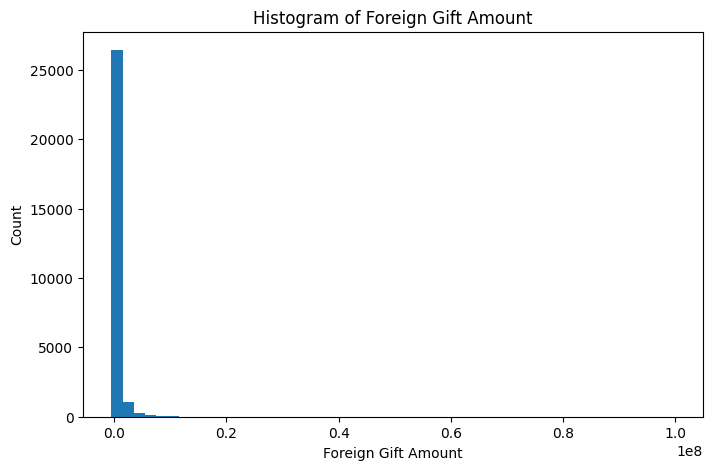

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [6]:
plt.figure(figsize=(8,5))
plt.hist(df["Foreign Gift Amount"], bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Histogram of Foreign Gift Amount")
plt.show()

df["Foreign Gift Amount"].describe()

2. The distribution is extremely right-skewed and most gifts are small to moderate while a few are very large. The mean is greater than the median.

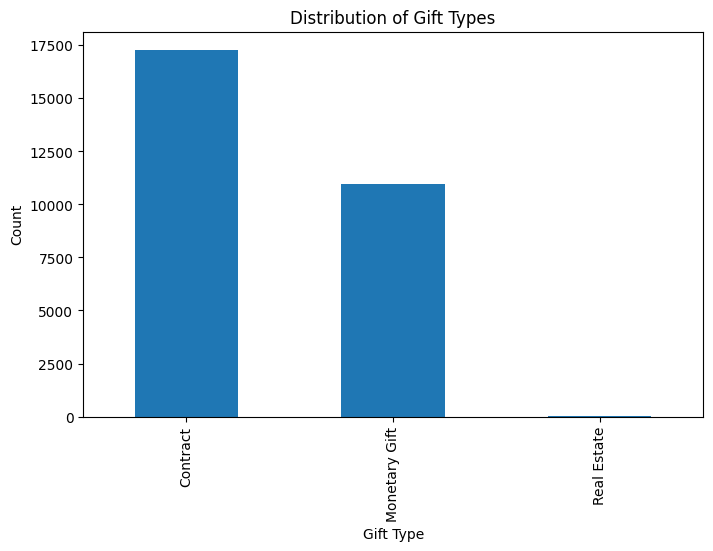

,count
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


In [7]:
gift_counts = df["Gift Type"].value_counts()
gift_counts
gift_counts.plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Gift Types")
plt.ylabel("Count")
plt.show()

# Proportions
gift_counts / gift_counts.sum()

In [9]:
top15_by_count = (
    df.groupby("Country of Giftor")["Foreign Gift Amount"]
      .count()
      .sort_values(ascending=False)
      .head(15)
)
top15_by_count

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [10]:
top15_by_amount = (
    df.groupby("Country of Giftor")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)
top15_by_amount


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [12]:
top15_institutions = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)
top15_institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


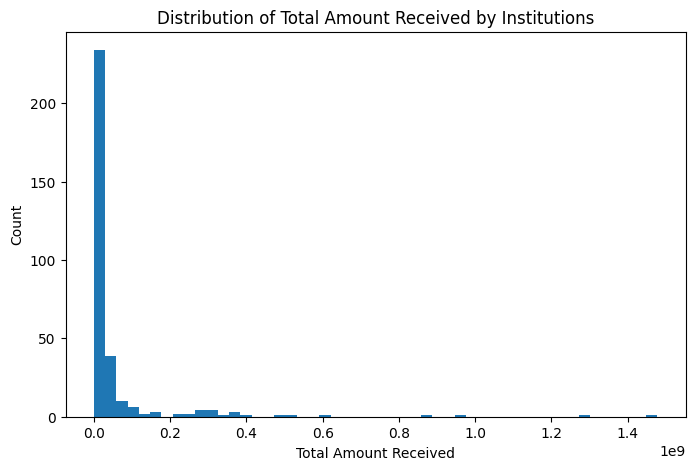

,Foreign Gift Amount
count,3.180000e+02
mean,5.220288e+07
std,1.535716e+08
min,5.000000e+02
25%,1.588842e+06
50%,6.486792e+06
75%,3.177063e+07
max,1.477923e+09


In [13]:
institution_totals = (
    df.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
)

plt.figure(figsize=(8,5))
plt.hist(institution_totals, bins=50)
plt.xlabel("Total Amount Received")
plt.ylabel("Count")
plt.title("Distribution of Total Amount Received by Institutions")
plt.show()

institution_totals.describe()


In [17]:
top_giftors = (
    df.groupby("Giftor Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)
top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?